In [ ]:
#Description: Classifies patients as having chronic kidney diease or not


In [4]:
import glob
from keras.models import Sequential, load_model 
import numpy as np 
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k  

In [22]:
from google.colab import files
uploaded = files.upload()

df= pd.read_csv('kidney_disease.csv')

df.head()

Saving kidney_disease.csv to kidney_disease (3).csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [23]:
df.shape

(400, 26)

In [24]:
columns_to_retain = ['sg', 'al', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
df =  df.dropna(axis=0)


In [25]:
for column in df.columns:
  if df[column].dtype != np.number:
    df[column] = LabelEncoder().fit_transform(df[column])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


In [26]:
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [27]:
X = df.drop(['classification'], axis=1)
y = df['classification']

In [28]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)



In [33]:
model = Sequential()
model.add(Dense(256, input_dim = len(X.columns),  kernel_initializer = k.initializers.random_normal(seed=13), activation='relu'))
model.add(Dense(1,activation='hard_sigmoid'))


In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=X_train.shape[0])



Epoch 1/2000
1/1 [==============================] - 1s 844ms/step - loss: 0.6994 - accuracy: 0.5197
Epoch 2/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6919 - accuracy: 0.5328
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6846 - accuracy: 0.5415
Epoch 4/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.6775 - accuracy: 0.5415
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6705 - accuracy: 0.9039
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6638 - accuracy: 0.9520
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6573 - accuracy: 0.9127
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6509 - accuracy: 0.9039
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6447 - accuracy: 0.8952
Epoch 10/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.6387 - accuracy: 0.8865
Epoch 11/2000

In [36]:
model.save('ckd.model')

Text(0.5, 0, 'epoch')

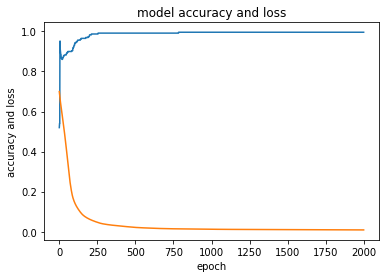

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel("accuracy and loss")
plt.xlabel('epoch')

In [39]:
print('shape of test data:', X_train.shape)
print('shape fo test data:', X_test.shape)

shape of test data: (229, 6)
shape fo test data: (58, 6)


In [44]:
pred = model.predict(X_test)
pred = [1 if y >= 0.5 else 0 for y in pred]
pred

print('Original : {0}'.format(','.join(str(x) for x in y_test)))
print('Predicted : {0}'.format(','.join(str(x) for x in pred)))



2/2 [==============================] - 0s 7ms/step
Original : 0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,1,1,0,0,1,1,0
Predicted : 1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,0,1,1,0
